### How can we group the good grains.. Which wheat is good to  buy...

* Wheat can be classified in three ways:  Colour (e.g., red, yellow, white)


* Planting season: spring wheat, planted in the spring and harvested in early fall; winter wheat,  planted in the fall, harvested the following summer Characteristics of the grain: durum, hard bread wheat, and soft wheat In Canada, hard spring wheat suitable for yeast products is grown on the Prairies. 

* In southern  Alberta, where winters are not as severe, some hard winter wheat is grown. Irrigated land in  Alberta also produces some white soft winter wheat. The main soft white winter wheat growing  area is southern Ontario.


* Now let us see thd data of the wheat , try to have the groups of wheat which are similar to each 
other based on multople features.


* The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment.


*  High quality visualization of the internal kernel structure was detected using a soft X-ray  technique. It is non-destructive and considerably cheaper than other more sophisticated imaging  techniques like scanning microscopy or laser technology.


*  The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using  combine harvested wheat grain originating from experimental fields, explored at the Institute of  Agrophysics of the Polish Academy of Sciences in Lublin.

How we can help identify the similar wheat..


###  Attribute Information:

* To construct the data, seven geometric parameters of wheat kernels were measured:
 1. area A,
 2. perimeter P,
 3. compactness C = 4piA/P^2,
 4. length of kernel,
 5. width of kernel,
 6. asymmetry coefficient
 7. length of kernel groove. All of these parameters were real-valued continuous

## Importing LIbraries and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
seeds = pd.read_csv("seeds.csv")

In [3]:
varieties = seeds['grain_variety']
# forget about the grain variety for the moment - we'll use this later
del seeds['grain_variety']

In [4]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [5]:
seeds.shape

(210, 7)

## Lets check the data type

In [6]:
seeds.dtypes

area                     float64
perimeter                float64
compactness              float64
length                   float64
width                    float64
asymmetry_coefficient    float64
groove_length            float64
dtype: object

## Let's check the summary of data

In [7]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


## Total Unique Value

In [9]:
seeds.nunique()

area                     193
perimeter                170
compactness              186
length                   188
width                    184
asymmetry_coefficient    207
groove_length            148
dtype: int64

## Missing Value

In [10]:
seeds.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
dtype: int64

## Data Visualization 

### Correlation matrix

<AxesSubplot:>

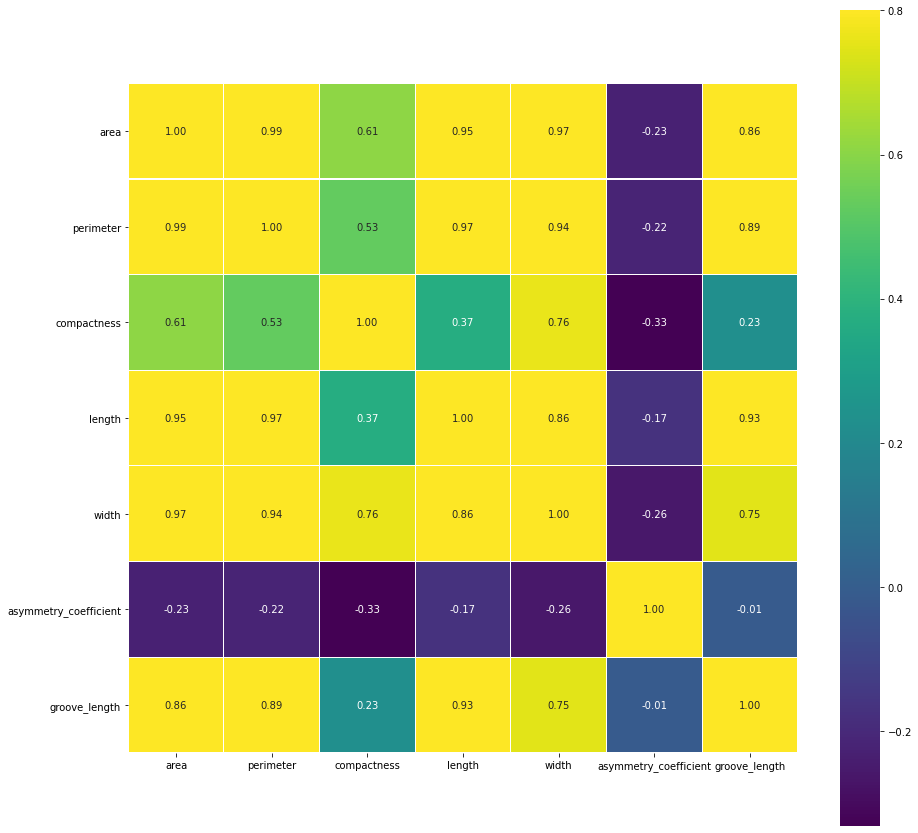

In [11]:
# Heatmap is a useful tool to get a quick understanding of which variables are important

colormap = plt.cm.viridis
cor = seeds.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

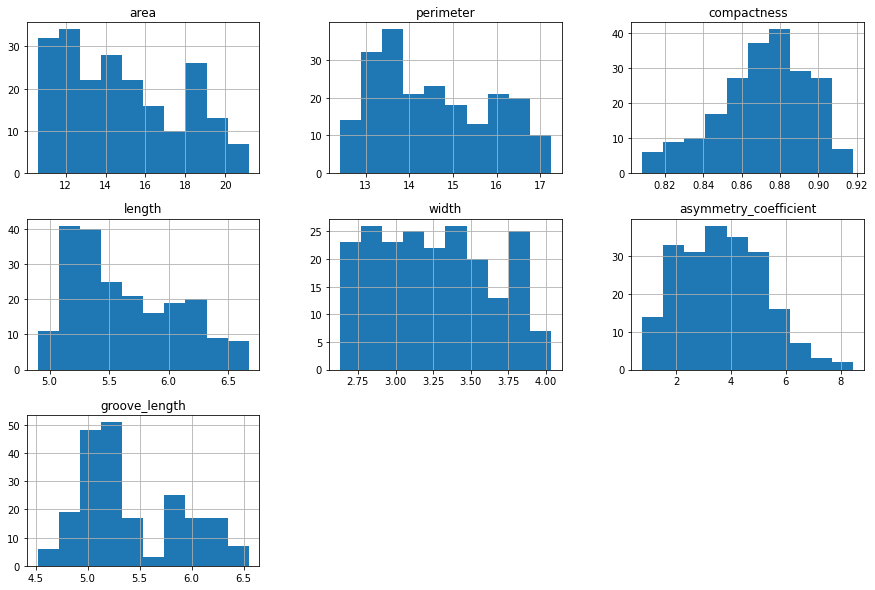

In [12]:
seeds.hist(figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'Plot of Area vs Asymmetry Coeff.')

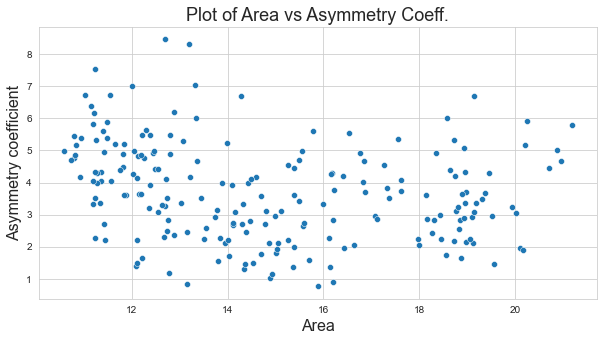

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'area', y = 'asymmetry_coefficient', data = seeds)
plt.xlabel('Area', fontsize=16)
plt.ylabel('Asymmetry coefficient', fontsize=16)
plt.title('Plot of Area vs Asymmetry Coeff.', fontsize=18)

Text(0.5, 1.0, 'Plot of Perimeter vs Asymmetry Coeff.')

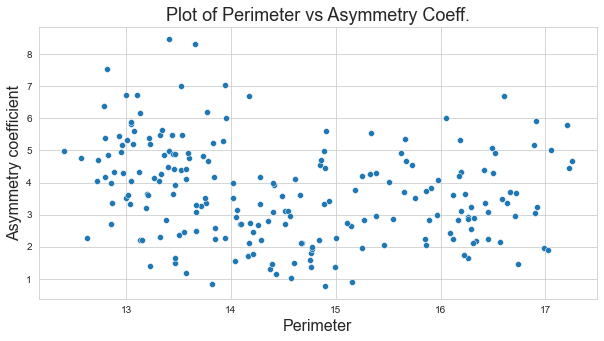

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'perimeter', y = 'asymmetry_coefficient', data = seeds)
plt.xlabel('Perimeter', fontsize=16)
plt.ylabel('Asymmetry coefficient', fontsize=16)
plt.title('Plot of Perimeter vs Asymmetry Coeff.', fontsize=18)

In [15]:
samples = seeds.values

### Elbow method 

* To find optimal k (number of clusters)



* WCSS - "within cluster sum of square"

In [16]:
from sklearn.cluster import KMeans

In [17]:
num_of_clusters = range(1,10)

In [18]:
wcss = []

In [19]:
for k in num_of_clusters:
    
    # create a Kmeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)
    
    # build the model using the data
    model.fit(samples)
    
    # append the inertia (wcss) to the list named "wccss"
    wcss.append(model.inertia_)

In [20]:
wcss

[2719.8524101779526,
 1011.7123453151188,
 587.3186115940429,
 471.027145682211,
 385.50729234904406,
 323.6983557677067,
 279.42466495514833,
 240.4022683736286,
 218.52434893106994]

Text(0, 0.5, 'WCSS')

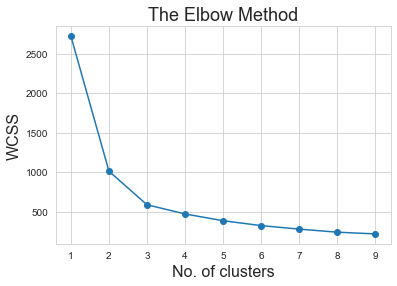

In [21]:
plt.plot(num_of_clusters,wcss, '-o')
plt.title('The Elbow Method',  fontsize = 18)
plt.xlabel('No. of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)

*  The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. 


* We used k-means and k-mediods with k = 3 in following clustering experiments.

###  Apply k-means clustering with k = 3

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)
labels = kmeans.fit_predict(samples)

kmeans.cluster_centers_

array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

In [29]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,2,60,10
2,68,9,0


### Average Silhoutte plot

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

num_of_clusters = list(range(2,7))
silhouette_score_list = []

for k in num_of_clusters:
    # Create a KMeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)
    
    # Build the model using the data and predict the clusters
    clusters_labels = model.fit_predict(samples)
    
    silhouette_score_list.append(silhouette_score(samples,clusters_labels))

In [31]:
num_of_clusters.insert(0,1)
silhouette_score_list.insert(0,0)

Text(0, 0.5, 'Silhouette coefficient')

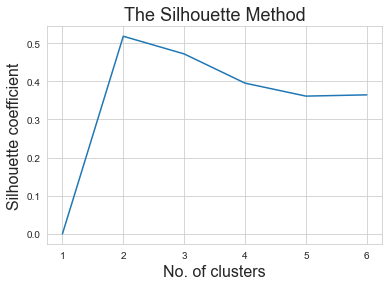

In [32]:
plt.plot(num_of_clusters,silhouette_score_list)
plt.title('The Silhouette Method',  fontsize = 18)
plt.xlabel('No. of clusters',  fontsize = 16)
plt.ylabel('Silhouette coefficient',  fontsize = 16)

### Dendrogram Method

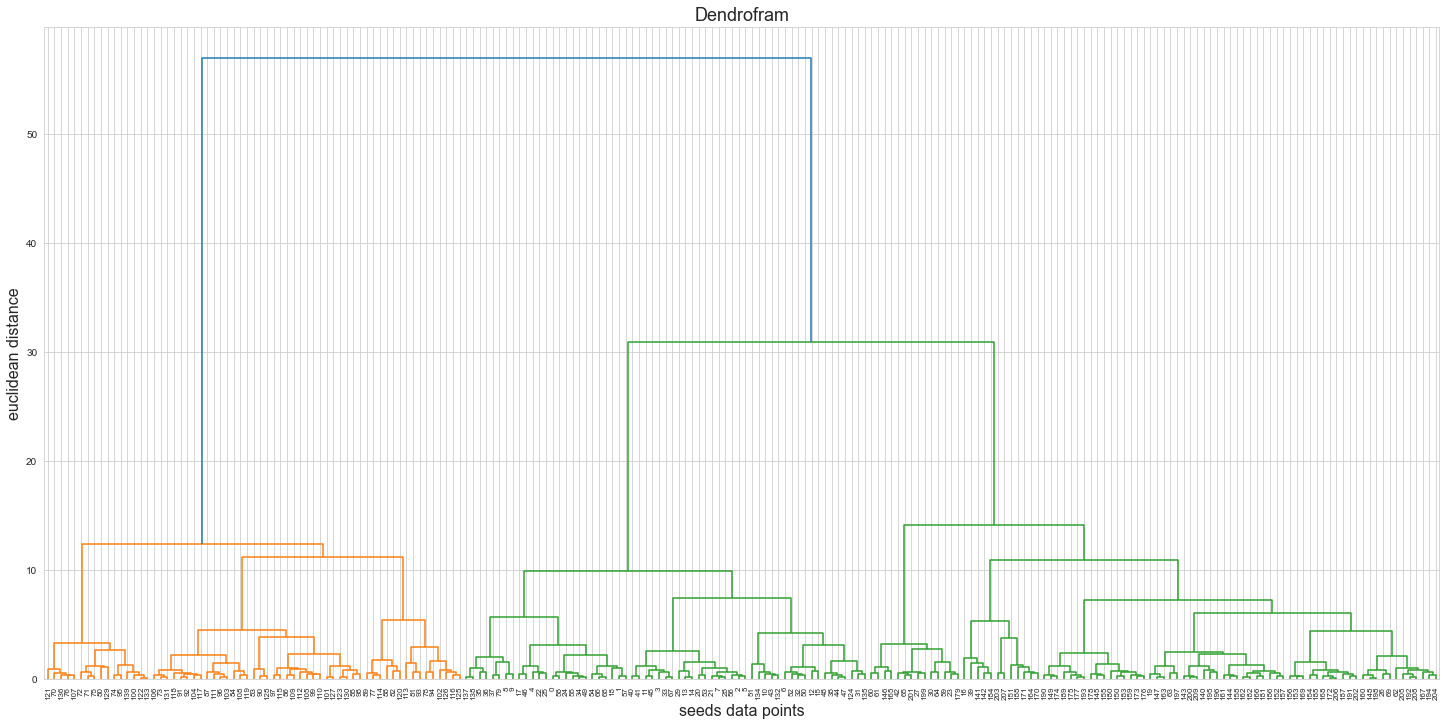

In [33]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,12))
sch.dendrogram(sch.linkage(samples, method='ward'));
plt.title('Dendrofram',  fontsize = 18)
plt.xlabel('seeds data points',  fontsize = 16)
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('euclidean distance',  fontsize = 16)
plt.show()

In [34]:
labels = model.fit_predict(samples)

In [35]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,46,2
1,0,0,33
2,49,2,0
3,0,0,15
4,21,14,0
5,0,8,20
